#### In this assignment students will build the random forest model after normalizing the variable to house pricing from boston data set.


In [2]:
#Course: Data Science Masters - ML 5
#Title: Assignment 25.1            
#Tool: Jupyter notebook 
#Author: Krishna A
#Date: 14-07-2018 (DD/MM/YYYY)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.linear_model import LinearRegression

In [3]:
boston = load_boston()

In [4]:
features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = boston.target

In [5]:
features.shape

(506, 13)

In [6]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
boston.target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [8]:
#add target prices to bos dataframe
features['PRICE'] = boston.target

In [9]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
features.PRICE.mean()

22.532806324110698

In [11]:
# Convert the column values of the dataframe as float
float_array = features['PRICE'].values.astype(float)


Normalizing the variable to housing price

In [12]:
# Create min max processing object. Pass the float column to min_max_scalar() whihch scales the dataframe by processing it
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
min_max_scalar = preprocessing.MinMaxScaler()
scaled_array = min_max_scalar.fit_transform(float_array)

ValueError: Expected 2D array, got 1D array instead:
array=[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 30.3 34.6 34.9 32.9 24.1 42.3 48.5 50.  22.6 24.4 22.5 24.4 20.
 21.7 19.3 22.4 28.1 23.7 25.  23.3 28.7 21.5 23.  26.7 21.7 27.5 30.1
 44.8 50.  37.6 31.6 46.7 31.5 24.3 31.7 41.7 48.3 29.  24.  25.1 31.5
 23.7 23.3 22.  20.1 22.2 23.7 17.6 18.5 24.3 20.5 24.5 26.2 24.4 24.8
 29.6 42.8 21.9 20.9 44.  50.  36.  30.1 33.8 43.1 48.8 31.  36.5 22.8
 30.7 50.  43.5 20.7 21.1 25.2 24.4 35.2 32.4 32.  33.2 33.1 29.1 35.1
 45.4 35.4 46.  50.  32.2 22.  20.1 23.2 22.3 24.8 28.5 37.3 27.9 23.9
 21.7 28.6 27.1 20.3 22.5 29.  24.8 22.  26.4 33.1 36.1 28.4 33.4 28.2
 22.8 20.3 16.1 22.1 19.4 21.6 23.8 16.2 17.8 19.8 23.1 21.  23.8 23.1
 20.4 18.5 25.  24.6 23.  22.2 19.3 22.6 19.8 17.1 19.4 22.2 20.7 21.1
 19.5 18.5 20.6 19.  18.7 32.7 16.5 23.9 31.2 17.5 17.2 23.1 24.5 26.6
 22.9 24.1 18.6 30.1 18.2 20.6 17.8 21.7 22.7 22.6 25.  19.9 20.8 16.8
 21.9 27.5 21.9 23.1 50.  50.  50.  50.  50.  13.8 13.8 15.  13.9 13.3
 13.1 10.2 10.4 10.9 11.3 12.3  8.8  7.2 10.5  7.4 10.2 11.5 15.1 23.2
  9.7 13.8 12.7 13.1 12.5  8.5  5.   6.3  5.6  7.2 12.1  8.3  8.5  5.
 11.9 27.9 17.2 27.5 15.  17.2 17.9 16.3  7.   7.2  7.5 10.4  8.8  8.4
 16.7 14.2 20.8 13.4 11.7  8.3 10.2 10.9 11.   9.5 14.5 14.1 16.1 14.3
 11.7 13.4  9.6  8.7  8.4 12.8 10.5 17.1 18.4 15.4 10.8 11.8 14.9 12.6
 14.1 13.  13.4 15.2 16.1 17.8 14.9 14.1 12.7 13.5 14.9 20.  16.4 17.7
 19.5 20.2 21.4 19.9 19.  19.1 19.1 20.1 19.9 19.6 23.2 29.8 13.8 13.3
 16.7 12.  14.6 21.4 23.  23.7 25.  21.8 20.6 21.2 19.1 20.6 15.2  7.
  8.1 13.6 20.1 21.8 24.5 23.1 19.7 18.3 21.2 17.5 16.8 22.4 20.6 23.9
 22.  11.9].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# Convert the scaled array to dataframe
df_normalized = pd.DataFrame(scaled_array)
df_normalized.head()

In [13]:
features['PRICE'] = df_normalized

NameError: name 'df_normalized' is not defined

In [14]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [15]:
features.fillna('0', inplace=True)

In [16]:
RF = RandomForestRegressor(n_estimators=25)

In [17]:
X = features.drop('PRICE', axis=1)

In [18]:
RF.fit(X, features.PRICE)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [19]:
from sklearn.metrics import accuracy_score, r2_score
r2_score(features.PRICE, RF.predict(X))

0.9802780875116858

In [20]:
Y = features.PRICE

In [21]:
X_Train,X_Test,Y_Train,Y_Test = train_test_split(X,Y,test_size = 0.3,random_state = 3)

In [22]:
RF.fit(X_Train, Y_Train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [23]:
pred_RF_train = RF.predict(X_Train)
pred_RF_test = RF.predict(X_Test)

In [24]:
print(r2_score(Y_Train, pred_RF_train))
print(r2_score(Y_Test, pred_RF_test))

0.9848712891339608
0.8340935193205112


In [25]:
pred_RF_test[:5]

array([40.344, 18.596, 19.8  , 30.972, 22.856])

In [26]:
Y_Test[:5]

224    44.8
137    17.1
453    17.8
303    33.1
254    21.9
Name: PRICE, dtype: float64

In [27]:
pred_RF_train = pred_RF_train[:,None]

In [28]:
trees = range(25)
accuracy = np.zeros(25)

In [29]:
pred_RF_test = pred_RF_test[:, None]

In [30]:
model = RandomForestRegressor()
model.fit(pred_RF_train, Y_Train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [31]:
print(model.feature_importances_)

[1.]


#### Impact of tree size in prediction accuracy

Running of different number of trees and see the effect of that
on accuracy of the prediction

In [32]:
for idx in range(len(trees)):
    regressor = RandomForestRegressor(n_estimators = idx + 1)
    reg = regressor.fit(pred_RF_train, Y_Train)
    predictions = reg.predict(pred_RF_test)
    accuracy[idx] = r2_score(Y_Test, predictions)
    

In [33]:
accuracy

array([0.81469812, 0.81611783, 0.82589262, 0.82608693, 0.81747258,
       0.81858232, 0.81493692, 0.82097038, 0.82164819, 0.82325582,
       0.82301317, 0.82130373, 0.816085  , 0.8243075 , 0.8225555 ,
       0.82557963, 0.82117812, 0.82152659, 0.82241533, 0.82406641,
       0.81968629, 0.82310799, 0.82290753, 0.81984301, 0.82575448])

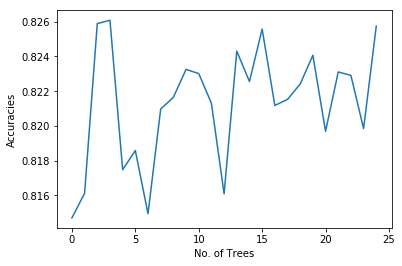

In [34]:
plt.cla()
plt.plot(trees, accuracy)
plt.xlabel('No. of Trees')
plt.ylabel('Accuracies')
plt.show()

#### Conclusion:
     So, in the above graph we can see that almost all the accuracies for each of the 
     25 decision trees taken one by one are almost above 83% which is same as the 
     accuracy score of the predictions made using the Random Forest taking the
     25 decision tree altogether which is also 83%.
    